WSIs found:  1
Slide name: 20230810_140324
Levels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Dimensions at level 0: (160256, 96768)


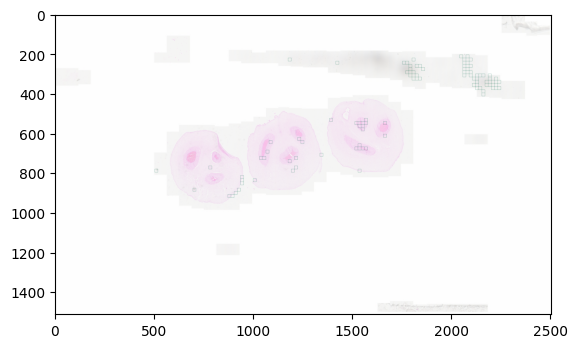

In [8]:

# histolab version v0.5.1
# https://histolab.readthedocs.io/en/v0.5.1/quickstart.html

import os
# local imports
if os.name == 'nt':
    import helpers.openslideimport #on windows, openslide needs to be installed manually, check local openslideimport.py
# histolab
from histolab.slide import SlideSet
from histolab.tiler import ScoreTiler
from histolab.scorer import CellularityScorer
import matplotlib.pyplot as plt

BASE_PATH = "G:\\placenta"
PROCESS_PATH_PLACENTA = os.path.join(BASE_PATH, 'histolab', 'processed')
placenta_slides = SlideSet(slides_path="G:\\placenta\\wsi", processed_path=PROCESS_PATH_PLACENTA, valid_extensions=[".tif", ".tiff"])

print("WSIs found: ", len(placenta_slides))

s = placenta_slides[0]

print(f"Slide name: {s.name}")
print(f"Levels: {s.levels}")
print(f"Dimensions at level 0: {s.dimensions}")

scored_tiles_extractor = ScoreTiler(
    scorer = CellularityScorer(),
    tile_size=(512, 512),
    n_tiles=1000,
    level=1,
    check_tissue=True,
    tissue_percent=20.0,
    pixel_overlap=0, # default
    prefix="scored/"+s.name.lower(), # save tiles in the "scored" subdirectory of slide's processed_path, with name of the slide's name
    suffix=".png" # default
)

img = scored_tiles_extractor.locate_tiles(
    slide=s,
    scale_factor=64,
    alpha=128,
    outline="#046C4C",
)

plt.imshow(img)

# always finds tiles first in the grey areas for the big pictures, Scorer settings does not matter..
# cannot read geojson annotations
# small pictures are okay tho

In [9]:
# scored_tiles_extractor.extract(s)